# 5 Regress-Then-Rank by Machine Learning

## 5.1 Monthly Rebalancing

Through this Section we model based on monthly downsampled data.

### 5.1 Features and Label Data Preparation

In [1]:
import pickle
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#### 5.1.1 Loading `label` data

In [7]:
with open("data/config/20220831_returns_scores.pkl","rb") as handle:
    label_data = pickle.load(handle)

In [8]:
label_data.keys()

dict_keys(['raw_returns', 'sma_vols', 'ewma_vols', 'score'])

In [10]:
y = label_data["raw_returns"]["monthly"]

In [15]:
y_volscaled = label_data["raw_returns"]["monthly"]/label_data["ewma_vols"]["monthly"]

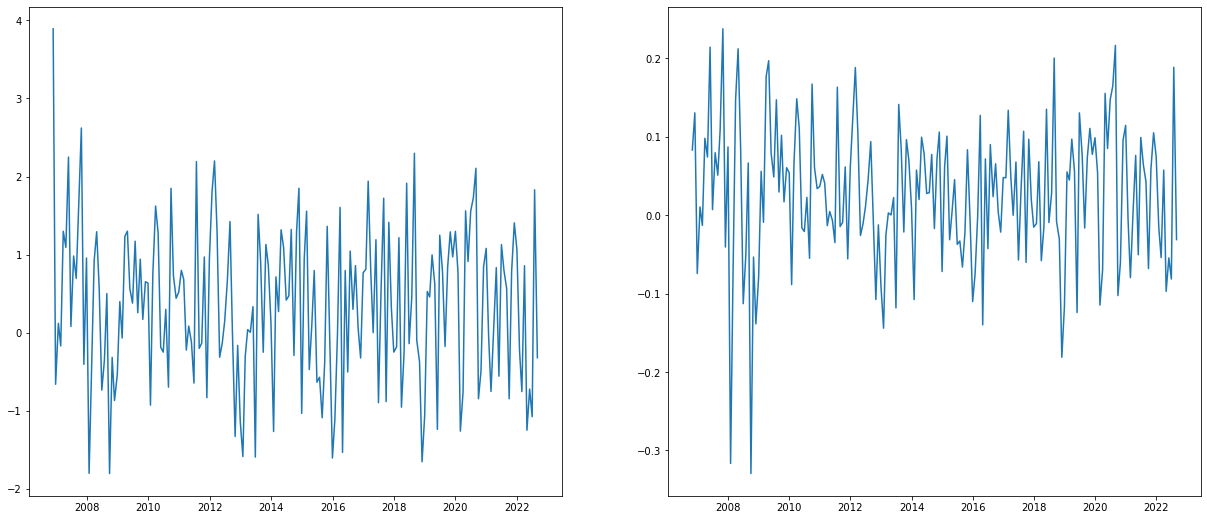

In [21]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(21,9))
ax1.plot(y_volscaled["AAPL"])
ax2.plot(y["AAPL"])

In [24]:
y

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2006-10-31,0.101485,0.083089,0.043786,-0.008851,0.033784,0.085266,0.011826,0.051021,0.096360,0.024427,...,0.063013,0.059834,0.065146,-0.083851,0.068867,0.083402,0.046690,0.160207,0.090922,-0.001202
2006-11-30,-0.050771,0.130488,-0.024598,-0.017891,0.049935,0.026872,-0.085770,-0.024474,0.120544,0.011276,...,-0.003142,-0.059611,0.003110,-0.096045,-0.025785,0.063396,-0.000430,-0.105313,0.062758,0.000512
2006-12-29,0.094535,-0.074406,-0.022396,0.043935,0.023904,0.010762,-0.089459,0.026060,-0.017484,-0.006397,...,0.029098,0.030989,0.096796,0.040222,0.043959,-0.025794,0.021730,-0.035917,0.004777,0.022209
2007-01-31,-0.081779,0.010491,0.165036,0.094464,-0.054718,-0.003650,0.001251,-0.031066,0.080573,-0.011539,...,-0.032817,-0.001156,-0.013819,-0.068145,-0.049735,0.004765,-0.014450,0.038731,0.099059,-0.017184
2007-02-28,-0.007812,-0.013064,0.005116,0.030565,0.009776,0.108703,0.076981,0.042539,-0.058783,-0.017134,...,0.087982,-0.031059,0.030573,0.026828,-0.081880,-0.047428,0.025442,-0.047230,-0.031364,-0.006475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,-0.097278,-0.097131,-0.022106,-0.037239,-0.130964,-0.065383,-0.007755,-0.041136,-0.116958,-0.009172,...,-0.066038,-0.107468,0.002917,-0.071959,-0.017090,-0.053009,-0.072821,-0.012939,-0.041042,-0.026116
2022-05-31,0.069506,-0.054496,0.026248,0.034890,0.051850,0.095893,0.018743,0.021817,0.097580,0.024650,...,0.135062,0.162099,0.083529,0.053539,0.011206,0.246064,0.074561,-0.060334,-0.017854,0.029261
2022-06-30,-0.068909,-0.081430,-0.085987,-0.075004,-0.121062,-0.132482,-0.145563,-0.053388,-0.172274,-0.044690,...,-0.021919,0.024468,0.102870,-0.029804,-0.085516,-0.088537,-0.074884,-0.085802,-0.157746,-0.075569


**VERY IMPORTANT** Shifting! We have to predict month return (or the scaled one) next period
1. Lagging Next Period Return

In [25]:
y = y.shift(-1)
y_volscaled = y_volscaled.shift(-1)

In [26]:
y

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2006-10-31,-0.050771,0.130488,-0.024598,-0.017891,0.049935,0.026872,-0.085770,-0.024474,0.120544,0.011276,...,-0.003142,-0.059611,0.003110,-0.096045,-0.025785,0.063396,-0.000430,-0.105313,0.062758,0.000512
2006-11-30,0.094535,-0.074406,-0.022396,0.043935,0.023904,0.010762,-0.089459,0.026060,-0.017484,-0.006397,...,0.029098,0.030989,0.096796,0.040222,0.043959,-0.025794,0.021730,-0.035917,0.004777,0.022209
2006-12-29,-0.081779,0.010491,0.165036,0.094464,-0.054718,-0.003650,0.001251,-0.031066,0.080573,-0.011539,...,-0.032817,-0.001156,-0.013819,-0.068145,-0.049735,0.004765,-0.014450,0.038731,0.099059,-0.017184
2007-01-31,-0.007812,-0.013064,0.005116,0.030565,0.009776,0.108703,0.076981,0.042539,-0.058783,-0.017134,...,0.087982,-0.031059,0.030573,0.026828,-0.081880,-0.047428,0.025442,-0.047230,-0.031364,-0.006475
2007-02-28,0.061102,0.098097,0.002852,0.021604,0.062420,-0.045335,0.068414,-0.022528,-0.086270,-0.024400,...,0.031624,0.057485,-0.011434,-0.037991,0.011086,0.030067,-0.013457,0.057026,0.007856,-0.018941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-29,0.069506,-0.054496,0.026248,0.034890,0.051850,0.095893,0.018743,0.021817,0.097580,0.024650,...,0.135062,0.162099,0.083529,0.053539,0.011206,0.246064,0.074561,-0.060334,-0.017854,0.029261
2022-05-31,-0.068909,-0.081430,-0.085987,-0.075004,-0.121062,-0.132482,-0.145563,-0.053388,-0.172274,-0.044690,...,-0.021919,0.024468,0.102870,-0.029804,-0.085516,-0.088537,-0.074884,-0.085802,-0.157746,-0.075569
2022-06-30,0.131073,0.188634,0.031453,0.006201,0.120363,0.177083,0.066624,0.147972,0.257967,0.030545,...,0.020004,0.032043,0.053510,0.082930,0.059459,0.117845,0.136909,-0.028219,0.103092,0.078153


2. Melting:

In [30]:
y_melted = pd.melt(
    y.dropna(),
    var_name="symbols",
    value_name="monthly_returns",
    ignore_index=False
).sort_values(by=["symbols"])
y_melted

,symbols,monthly_returns
Date,,
2006-10-31,A,-0.050771
2016-11-30,A,0.038925
2016-12-30,A,0.074847
2017-01-31,A,0.047580
2017-02-28,A,0.033162
...,...,...
2012-04-30,ZION,-0.066197
2012-05-31,ZION,0.020493
2012-06-29,ZION,-0.062822


In [31]:
y_melted["symbols"].unique()

array(['A', 'AA', 'AAPL', 'ABC', 'ABT', 'ACIW', 'ADBE', 'ADI', 'ADM',
       'ADP', 'ADSK', 'ADTN', 'AEE', 'AEO', 'AEP', 'AES', 'AFL', 'AIG',
       'AKR', 'ALE', 'ALL', 'ALX', 'AMAT', 'AMD', 'AMG', 'AMGN', 'AMP',
       'AMZN', 'ANF', 'ANGO', 'AON', 'APA', 'APD', 'ARE', 'ASB', 'AVA',
       'AVT', 'AVY', 'AZO', 'BA', 'BAC', 'BANR', 'BAX', 'BBBY', 'BBY',
       'BCO', 'BDN', 'BDX', 'BEN', 'BF-B', 'BFS', 'BHE', 'BHLB', 'BIIB',
       'BK', 'BKD', 'BMY', 'BOH', 'BOKF', 'BPOP', 'BRC', 'BRKL', 'BSRR',
       'BSX', 'BUSE', 'BXP', 'BZH', 'CADE', 'CAG', 'CAH', 'CAKE', 'CASS',
       'CAT', 'CB', 'CBSH', 'CCBG', 'CCL', 'CDE', 'CFFN', 'CI', 'CINF',
       'CIR', 'CL', 'CLX', 'CMA', 'CMCSA', 'CME', 'CMI', 'CMS', 'CNA',
       'CNP', 'CNSL', 'COF', 'COP', 'COST', 'CPB', 'CPF', 'CPSI', 'CRS',
       'CSCO', 'CSGS', 'CSX', 'CTAS', 'CTBI', 'CTO', 'CTXS', 'CUZ', 'CVS',
       'CVX', 'CXW', 'CYH', 'D', 'DCI', 'DCOM', 'DD', 'DE', 'DGX', 'DHC',
       'DHI', 'DHR', 'DIS', 'DISH', 'DOV', 'DRI', 'DRQ', '

In [32]:
y_volscaled_melted = pd.melt(
    y_volscaled.dropna(),
    var_name="symbols",
    value_name="monthly_returns",
    ignore_index=False
).sort_values(by=["symbols"])
y_volscaled_melted

,symbols,monthly_returns
Date,,
2006-10-31,A,-0.471579
2016-11-30,A,0.662013
2016-12-30,A,1.261037
2017-01-31,A,0.856061
2017-02-28,A,0.647222
...,...,...
2012-04-30,ZION,-0.568345
2012-05-31,ZION,0.191014
2012-06-29,ZION,-0.614563


In [40]:
y.drop(columns=["Date"], inplace=True)

In [41]:
y_melted["Date"] = y_melted.index
y_melted

,symbols,monthly_returns,Date
Date,,,
2006-10-31,A,-0.050771,2006-10-31
2016-11-30,A,0.038925,2016-11-30
2016-12-30,A,0.074847,2016-12-30
2017-01-31,A,0.047580,2017-01-31
2017-02-28,A,0.033162,2017-02-28
...,...,...,...
2012-04-30,ZION,-0.066197,2012-04-30
2012-05-31,ZION,0.020493,2012-05-31
2012-06-29,ZION,-0.062822,2012-06-29


In [43]:
y_melted.drop(columns="Date", inplace=True)

In [44]:
y_melted.reset_index()

,Date,symbols,monthly_returns
0,2006-10-31,A,-0.050771
1,2016-11-30,A,0.038925
2,2016-12-30,A,0.074847
3,2017-01-31,A,0.047580
4,2017-02-28,A,0.033162
...,...,...,...
89105,2012-04-30,ZION,-0.066197
89106,2012-05-31,ZION,0.020493
89107,2012-06-29,ZION,-0.062822
89108,2011-09-30,ZION,0.232954


In [46]:
y_melted.sort_values(
    by=["Date","symbols"]
).loc["2006-10-31",:]

,symbols,monthly_returns
Date,,
2006-10-31,A,-0.050771
2006-10-31,AA,0.083797
2006-10-31,AAPL,0.130488
2006-10-31,ABC,-0.024598
2006-10-31,ABT,-0.017891
...,...,...
2006-10-31,XRX,-0.029412
2006-10-31,Y,0.120523
2006-10-31,YUM,0.029095


In [47]:
y_melted_c = y_melted.copy()
y_volscaled_melted_c = y_volscaled_melted.copy()
y_melted_c.reset_index(inplace=True)
y_volscaled_melted_c.reset_index(inplace=True)

* Joining `labels` (**Raw** and **Scaled** Lagged Monthly Returns)

In [56]:
labels = pd.merge(y_melted_c, y_volscaled_melted_c, on=["Date","symbols"], how="inner").rename(
    columns={
        "monthly_returns_x": "raw",
        "monthly_returns_y": "scaled"
    }
).sort_values(by=["Date","symbols"]).reset_index()

In [58]:
labels.drop(columns="index", inplace=True)

In [59]:
labels

,Date,symbols,raw,scaled
0,2006-10-31,A,-0.050771,-0.471579
1,2006-10-31,AA,0.083797,3.195029
2,2006-10-31,AAPL,0.130488,3.893237
3,2006-10-31,ABC,-0.024598,-0.508692
4,2006-10-31,ABT,-0.017891,-2.798996
...,...,...,...,...
89105,2022-07-29,XRX,-0.029772,-0.237270
89106,2022-07-29,Y,0.004418,0.056570
89107,2022-07-29,YUM,-0.087764,-1.205921
89108,2022-07-29,ZBH,-0.036869,-0.551685


In [60]:
labels.to_csv(
    "data/config/20220831_lagged_returns_monthly.csv",
    index=False
)

* Cleaning:

In [ ]:
del y, y_melted, y_melted_c, y_volscaled, y_volscaled_melted, y_volscaled_melted_c

In [67]:
%whos DataFrame

Variable   Type         Data/Info
---------------------------------
labels     DataFrame                Date symbols <...>n[89110 rows x 4 columns]


* Adding more Label (Target) Data Candidates (Next-Month ISR with diff windows)

In [3]:
target = pd.read_csv(
    "data/config/20220831_lagged_returns_monthly.csv",
    index_col="Date",
    parse_dates=True
)

In [4]:
target

,symbols,raw,scaled
Date,,,
2006-10-31,A,-0.050771,-0.471579
2006-10-31,AA,0.083797,3.195029
2006-10-31,AAPL,0.130488,3.893237
2006-10-31,ABC,-0.024598,-0.508692
2006-10-31,ABT,-0.017891,-2.798996
...,...,...,...
2022-07-29,XRX,-0.029772,-0.237270
2022-07-29,Y,0.004418,0.056570
2022-07-29,YUM,-0.087764,-1.205921


In [5]:
with open("data/config/20220831_isharpe_scores.pkl","rb") as file:
    isr_score_data = pickle.load(file=file)

dict_keys(['daily', 'weekly', 'monthly'])

In [6]:
isr_score_data.keys()
isr_score_data["monthly"].keys()

dict_keys(['12m', '3m', '6m'])

In [11]:
isr_score_monthly3m = pd.melt(
    isr_score_data["monthly"]["3m"].dropna(how="all"),
    var_name="symbols",
    value_name="ISR3M",
    ignore_index=False
).reset_index()

isr_score_monthly6m = pd.melt(
    isr_score_data["monthly"]["6m"].dropna(how="all"),
    var_name="symbols",
    value_name="ISR6M",
    ignore_index=False
).reset_index()

isr_score_monthly12m = pd.melt(
    isr_score_data["monthly"]["12m"].dropna(how="all"),
    var_name="symbols",
    value_name="ISR12M",
    ignore_index=False
).reset_index()

In [14]:
isr_score_fast = pd.merge(
    isr_score_monthly3m, 
    isr_score_monthly6m,
    how="inner",
    on=["symbols","Date"]).sort_values(
        by=["Date","symbols"]
    ).reset_index()

,index,Date,symbols,ISR3M,ISR6M
0,0,2007-04-30,A,12.0,8.0
1,52624,2007-04-30,AA,11.0,12.0
2,184,2007-04-30,AAPL,19.0,11.0
3,368,2007-04-30,ABC,2.0,6.0
4,552,2007-04-30,ABT,5.0,12.0
...,...,...,...,...,...
86291,49127,2022-07-29,XRX,6.0,9.0
86292,52623,2022-07-29,Y,12.0,15.0
86293,43607,2022-07-29,YUM,6.0,9.0
86294,43791,2022-07-29,ZBH,6.0,9.0


In [16]:
isr_score_all = pd.merge(
    isr_score_fast,
    isr_score_monthly12m,
    how="inner",
    on=["symbols","Date"]).sort_values(
        by=["Date","symbols"]
).reset_index()

isr_score_all.drop(
    columns=["level_0","index"],
    inplace=True
)

In [20]:
isr_score_all.to_csv(
    "data/config/20220831_lagged_isharpe_scores_monthly.csv",
    index=False
)

In [19]:
target

,symbols,raw,scaled
Date,,,
2006-10-31,A,-0.050771,-0.471579
2006-10-31,AA,0.083797,3.195029
2006-10-31,AAPL,0.130488,3.893237
2006-10-31,ABC,-0.024598,-0.508692
2006-10-31,ABT,-0.017891,-2.798996
...,...,...,...
2022-07-29,XRX,-0.029772,-0.237270
2022-07-29,Y,0.004418,0.056570
2022-07-29,YUM,-0.087764,-1.205921


#### 5.1.2 Loading `feature` data

In [68]:
with open("data/config/20220831_all_rolling_rets_data.pkl","rb") as handle:
    features_data = pickle.load(handle)

In [70]:
features_data["raw_cumrets"]["monthly"].keys()

dict_keys(['1m', '2m', '3m', '6m', '12m'])

In [72]:
features_data["scaled_cumrets"]["monthly"].keys()

dict_keys(['1m', '2m', '3m', '6m', '12m'])

In [86]:
lst_features_raw_rets = []

for win in features_data["raw_cumrets"]["monthly"]:
    feature = pd.DataFrame()

    feature = pd.melt(
        features_data["raw_cumrets"]["monthly"][win].dropna(how="all"),
        var_name="symbols",
        value_name="RRET"+win.upper(),
        ignore_index=False
    ).sort_values(by=["Date","symbols"])

    feature.reset_index(inplace=True)
    lst_features_raw_rets.append(feature)

In [94]:
pd.merge()

Date       0
symbols    0
RRET12M    0
dtype: int64

In [95]:
# All RRETs together
from functools import reduce

data_merge = reduce(
    lambda left,right: pd.merge(
        left, right,
        on=["Date","symbols"], 
        how="inner"), 
        lst_features_raw_rets
    )

In [97]:
rret_features = data_merge.copy()

In [98]:
lst_features_rets = []

for win in features_data["scaled_cumrets"]["monthly"]:
    feature = pd.DataFrame()

    feature = pd.melt(
        features_data["scaled_cumrets"]["monthly"][win].dropna(how="all"),
        var_name="symbols",
        value_name="SRET"+win.upper(),
        ignore_index=False
    ).sort_values(by=["Date","symbols"])


    feature.reset_index(inplace=True)
    lst_features_rets.append(feature)

In [100]:
data_merge

,Date,symbols,RRET1M,RRET2M,RRET3M,RRET6M,RRET12M
0,2007-10-31,A,-0.004054,0.012362,-0.045831,0.010974,0.120625
1,2007-10-31,AA,0.023467,0.088467,0.049675,0.139174,0.442392
2,2007-10-31,AAPL,0.198801,0.371679,0.391677,0.891933,1.361976
3,2007-10-31,ABC,0.037894,-0.015465,0.027289,-0.055854,0.041181
4,2007-10-31,ABT,-0.009210,0.058548,0.073018,-0.036949,0.187770
...,...,...,...,...,...,...,...
83946,2022-08-31,XRX,-0.021201,0.177054,-0.107460,-0.130173,-0.223268
83947,2022-08-31,Y,0.004994,0.008730,0.010147,0.256937,0.243080
83948,2022-08-31,YUM,-0.084701,-0.042195,-0.063930,-0.079185,-0.135248
83949,2022-08-31,ZBH,-0.067859,-0.008856,-0.106637,-0.129800,-0.266523


In [101]:
lst_features_rets[-1]

,Date,symbols,SRET12M
0,2007-10-31,A,0.377537
1,2007-10-31,AA,1.162594
2,2007-10-31,AAPL,3.379097
3,2007-10-31,ABC,0.141491
4,2007-10-31,ABT,0.855951
...,...,...,...
83946,2022-08-31,XRX,-0.491655
83947,2022-08-31,Y,12.292707
83948,2022-08-31,YUM,-0.632140
83949,2022-08-31,ZBH,-0.989119


In [102]:
sret_features = reduce(
    lambda left,right: pd.merge(
        left, right,
        on=["Date","symbols"], 
        how="inner"), 
        lst_features_rets
    )

In [103]:
sret_features

,Date,symbols,SRET1M,SRET2M,SRET3M,SRET6M,SRET12M
0,2007-10-31,A,-0.043954,0.094777,-0.286889,0.048575,0.377537
1,2007-10-31,AA,0.213632,0.569478,0.261090,0.517240,1.162594
2,2007-10-31,AAPL,1.708604,2.258785,1.943524,3.129527,3.379097
3,2007-10-31,ABC,0.451016,-0.130154,0.187520,-0.271396,0.141491
4,2007-10-31,ABT,-0.145429,0.653751,0.665704,-0.238196,0.855951
...,...,...,...,...,...,...,...
83946,2022-08-31,XRX,-0.161729,0.955026,-0.473271,-0.405387,-0.491655
83947,2022-08-31,Y,0.874860,1.081406,1.026316,18.375519,12.292707
83948,2022-08-31,YUM,-1.371398,-0.483079,-0.597613,-0.523410,-0.632140
83949,2022-08-31,ZBH,-0.872393,-0.080507,-0.791500,-0.681243,-0.989119


In [104]:
# Finally All Momentum Features (MVP) for Monthly Downsampled Data
all_momentum_features = pd.merge(
    rret_features, sret_features,
    on = ["Date","symbols"],
    how="inner"
)

all_momentum_features

,Date,symbols,RRET1M,RRET2M,RRET3M,RRET6M,RRET12M,SRET1M,SRET2M,SRET3M,SRET6M,SRET12M
0,2007-10-31,A,-0.004054,0.012362,-0.045831,0.010974,0.120625,-0.043954,0.094777,-0.286889,0.048575,0.377537
1,2007-10-31,AA,0.023467,0.088467,0.049675,0.139174,0.442392,0.213632,0.569478,0.261090,0.517240,1.162594
2,2007-10-31,AAPL,0.198801,0.371679,0.391677,0.891933,1.361976,1.708604,2.258785,1.943524,3.129527,3.379097
3,2007-10-31,ABC,0.037894,-0.015465,0.027289,-0.055854,0.041181,0.451016,-0.130154,0.187520,-0.271396,0.141491
4,2007-10-31,ABT,-0.009210,0.058548,0.073018,-0.036949,0.187770,-0.145429,0.653751,0.665704,-0.238196,0.855951
...,...,...,...,...,...,...,...,...,...,...,...,...
83946,2022-08-31,XRX,-0.021201,0.177054,-0.107460,-0.130173,-0.223268,-0.161729,0.955026,-0.473271,-0.405387,-0.491655
83947,2022-08-31,Y,0.004994,0.008730,0.010147,0.256937,0.243080,0.874860,1.081406,1.026316,18.375519,12.292707
83948,2022-08-31,YUM,-0.084701,-0.042195,-0.063930,-0.079185,-0.135248,-1.371398,-0.483079,-0.597613,-0.523410,-0.632140
83949,2022-08-31,ZBH,-0.067859,-0.008856,-0.106637,-0.129800,-0.266523,-0.872393,-0.080507,-0.791500,-0.681243,-0.989119


Dumping for future use or archive

In [106]:
all_momentum_features.to_csv(
    "data/config/20220831_features_monthly.csv",
    index=False
)

* Adding ISR Downsampled Monthly

In [22]:
# Load Unmelted ISR Monthly-Data
with open("data/config/20220831_all_isharpes_data.pkl","rb") as h:
    isharpe_features = pickle.load(h)

isharpe_features["monthly"].keys()

dict_keys(['3m', '6m', '12m'])

In [28]:
isharpe_features["monthly"]["12m"].tail(2)

,A,AAPL,ABC,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,...,NWN,PRGO,RGP,SBCF,SHBI,UGI,WAFD,FORR,FRT,WABC
Date,,,,,,,,,,,,,,,,,,,,,
2022-07-29,-0.026410,0.496807,0.925420,-0.017197,-0.136198,0.276797,1.377139,0.682388,-0.144272,0.694364,...,0.257295,-0.023225,1.228890,0.741971,0.856637,-0.002291,0.500723,0.259639,-0.007319,0.478570
2022-08-31,-0.090856,0.233680,0.878068,-0.044855,-0.206022,0.010553,1.548641,0.845460,-0.117799,0.505265,...,-0.000200,-0.013538,0.839076,0.288541,0.604541,-0.027249,0.110438,-0.034631,-0.032382,0.212403


In [23]:
lst_features_isharpe = []

for win in isharpe_features["monthly"]:
    feature = pd.DataFrame()

    feature = pd.melt(
        isharpe_features["monthly"][win].dropna(how="all"),
        var_name="symbols",
        value_name="ISR"+win.upper(),
        ignore_index=False
    ).sort_values(by=["Date","symbols"])


    feature.reset_index(inplace=True)
    lst_features_isharpe.append(feature)

In [26]:
lst_features_isharpe[0]

,Date,symbols,ISR3M
0,2007-01-31,A,-0.018226
1,2007-01-31,AA,2.583855
2,2007-01-31,AAPL,0.915910
3,2007-01-31,ABC,2.016351
4,2007-01-31,ABT,2.931818
...,...,...,...
88167,2022-08-31,XRX,-0.160013
88168,2022-08-31,Y,1.978339
88169,2022-08-31,YUM,-0.051802
88170,2022-08-31,ZBH,-0.113420


In [29]:
from functools import reduce

isharpe_merged = reduce(
    lambda left,right: pd.merge(
        left, right,
        on=["Date","symbols"], 
        how="inner"), 
        lst_features_isharpe
    )

In [30]:
isharpe_merged

,Date,symbols,ISR3M,ISR6M,ISR12M
0,2007-09-28,A,-0.036105,0.807678,0.934628
1,2007-09-28,AA,-0.013976,1.008709,1.414829
2,2007-09-28,AAPL,2.253278,2.934566,2.349040
3,2007-09-28,ABC,-0.052868,-0.053252,0.270601
4,2007-09-28,ABT,0.242512,-0.007232,0.864342
...,...,...,...,...,...
84415,2022-08-31,XRX,-0.160013,-0.078156,-0.069290
84416,2022-08-31,Y,1.978339,1.362023,0.910676
84417,2022-08-31,YUM,-0.051802,-0.033792,-0.027119
84418,2022-08-31,ZBH,-0.113420,-0.068347,-0.073511


In [32]:
legacy_features = pd.read_csv(
    "data/config/20220831_features_monthly.csv",
    index_col="Date",
    parse_dates=True
).reset_index()

In [33]:
legacy_features

,Date,symbols,RRET1M,RRET2M,RRET3M,RRET6M,RRET12M,SRET1M,SRET2M,SRET3M,SRET6M,SRET12M
0,2007-10-31,A,-0.004054,0.012362,-0.045831,0.010974,0.120625,-0.043954,0.094777,-0.286889,0.048575,0.377537
1,2007-10-31,AA,0.023467,0.088467,0.049675,0.139174,0.442392,0.213632,0.569478,0.261090,0.517240,1.162594
2,2007-10-31,AAPL,0.198801,0.371679,0.391677,0.891933,1.361976,1.708604,2.258785,1.943524,3.129527,3.379097
3,2007-10-31,ABC,0.037894,-0.015465,0.027289,-0.055854,0.041181,0.451016,-0.130154,0.187520,-0.271396,0.141491
4,2007-10-31,ABT,-0.009210,0.058548,0.073018,-0.036949,0.187770,-0.145429,0.653751,0.665704,-0.238196,0.855951
...,...,...,...,...,...,...,...,...,...,...,...,...
83946,2022-08-31,XRX,-0.021201,0.177054,-0.107460,-0.130173,-0.223268,-0.161729,0.955026,-0.473271,-0.405387,-0.491655
83947,2022-08-31,Y,0.004994,0.008730,0.010147,0.256937,0.243080,0.874860,1.081406,1.026316,18.375519,12.292707
83948,2022-08-31,YUM,-0.084701,-0.042195,-0.063930,-0.079185,-0.135248,-1.371398,-0.483079,-0.597613,-0.523410,-0.632140
83949,2022-08-31,ZBH,-0.067859,-0.008856,-0.106637,-0.129800,-0.266523,-0.872393,-0.080507,-0.791500,-0.681243,-0.989119


In [34]:
all_features = pd.merge(
    legacy_features,
    isharpe_merged,
    how="inner",
    on=["Date","symbols"]
) 
all_features

,Date,symbols,RRET1M,RRET2M,RRET3M,RRET6M,RRET12M,SRET1M,SRET2M,SRET3M,SRET6M,SRET12M,ISR3M,ISR6M,ISR12M
0,2007-10-31,A,-0.004054,0.012362,-0.045831,0.010974,0.120625,-0.043954,0.094777,-0.286889,0.048575,0.377537,-0.043293,0.218709,0.592724
1,2007-10-31,AA,0.023467,0.088467,0.049675,0.139174,0.442392,0.213632,0.569478,0.261090,0.517240,1.162594,0.694973,0.873066,1.274447
2,2007-10-31,AAPL,0.198801,0.371679,0.391677,0.891933,1.361976,1.708604,2.258785,1.943524,3.129527,3.379097,3.461684,3.534918,2.782748
3,2007-10-31,ABC,0.037894,-0.015465,0.027289,-0.055854,0.041181,0.451016,-0.130154,0.187520,-0.271396,0.141491,0.510378,-0.021059,0.413389
4,2007-10-31,ABT,-0.009210,0.058548,0.073018,-0.036949,0.187770,-0.145429,0.653751,0.665704,-0.238196,0.855951,1.383667,-0.011155,0.947518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83946,2022-08-31,XRX,-0.021201,0.177054,-0.107460,-0.130173,-0.223268,-0.161729,0.955026,-0.473271,-0.405387,-0.491655,-0.160013,-0.078156,-0.069290
83947,2022-08-31,Y,0.004994,0.008730,0.010147,0.256937,0.243080,0.874860,1.081406,1.026316,18.375519,12.292707,1.978339,1.362023,0.910676
83948,2022-08-31,YUM,-0.084701,-0.042195,-0.063930,-0.079185,-0.135248,-1.371398,-0.483079,-0.597613,-0.523410,-0.632140,-0.051802,-0.033792,-0.027119
83949,2022-08-31,ZBH,-0.067859,-0.008856,-0.106637,-0.129800,-0.266523,-0.872393,-0.080507,-0.791500,-0.681243,-0.989119,-0.113420,-0.068347,-0.073511


In [35]:
all_features.to_csv(
    "data/config/20220831_enhanced_features_monthly.csv",
    index=False
)

Dumping Complete MVP Dataset (first enhanced labels, first enhanced features)

In [36]:
%whos DataFrame


Variable               Type         Data/Info
---------------------------------------------
all_features           DataFrame                Date symbols <...>[83951 rows x 15 columns]
feature                DataFrame                Date symbols <...>n[84420 rows x 3 columns]
isharpe_merged         DataFrame                Date symbols <...>n[84420 rows x 5 columns]
isr_score_all          DataFrame                Date symbols <...>n[83951 rows x 5 columns]
isr_score_fast         DataFrame           index       Date s<...>n[86296 rows x 5 columns]
isr_score_monthly12m   DataFrame                Date symbols <...>n[83951 rows x 3 columns]
isr_score_monthly3m    DataFrame                Date symbols <...>n[87703 rows x 3 columns]
isr_score_monthly6m    DataFrame                Date symbols <...>n[86296 rows x 3 columns]
legacy_features        DataFrame                Date symbols <...>[83951 rows x 12 columns]
target                 DataFrame               symbols       <...>n[89110 rows x

In [41]:
isr_score_all

,Date,symbols,ISR3M,ISR6M,ISR12M
0,2007-09-28,A,3.0,6.0,11.0
1,2007-09-28,AA,5.0,9.0,15.0
2,2007-09-28,AAPL,12.0,18.0,19.0
3,2007-09-28,ABC,4.0,5.0,9.0
4,2007-09-28,ABT,7.0,5.0,13.0
...,...,...,...,...,...
83946,2022-07-29,XRX,6.0,9.0,5.0
83947,2022-07-29,Y,12.0,15.0,18.0
83948,2022-07-29,YUM,6.0,9.0,8.0
83949,2022-07-29,ZBH,6.0,9.0,4.0


In [40]:
import gc
gc.collect()

483

In [61]:
# Enhancing Target Possibilities With ISR PerformanceMeasure calculation.
# In doing so, we need the corresponding unmelted features time-seriess in order to lag one period before.
ISR12M_lagged = pd.melt(
    isharpe_features["monthly"]["12m"].shift(-1).dropna(how="all"),
    var_name="symbols",
    value_name="ISR12M",
    ignore_index=False
).sort_values(by=["Date","symbols"])

ISR6M_lagged = pd.melt(
    isharpe_features["monthly"]["6m"].shift(-1).dropna(how="all"),
    var_name="symbols",
    value_name="ISR6M",
    ignore_index=False
).sort_values(by=["Date","symbols"])

In [63]:
ISR6M_lagged.reset_index(inplace=True)

In [64]:
ISR12M_lagged.reset_index(inplace=True)

In [65]:
ISR6M_lagged

,Date,symbols,ISR6M
0,2007-04-30,A,1.623659
1,2007-04-30,AA,2.511063
2,2007-04-30,AAPL,2.141045
3,2007-04-30,ABC,1.189063
4,2007-04-30,ABT,2.444557
...,...,...,...
86291,2022-07-29,XRX,-0.078156
86292,2022-07-29,Y,1.362023
86293,2022-07-29,YUM,-0.033792
86294,2022-07-29,ZBH,-0.068347


In [67]:
pd.merge(
    isr_score_all.rename(
        columns={
            "ISR3M": "ISC3M",
            "ISR6M": "ISC6M",
            "ISR12M": "ISC12M"
        }
    ),pd.merge(
        ISR6M_lagged,
        ISR12M_lagged,
        how="inner",
        on=["Date","symbols"]
    ),
    how="inner",
    on=["Date","symbols"]
)

,Date,symbols,ISC3M,ISC6M,ISC12M,ISR6M,ISR12M
0,2007-09-28,A,3.0,6.0,11.0,0.218709,0.592724
1,2007-09-28,AA,5.0,9.0,15.0,0.873066,1.274447
2,2007-09-28,AAPL,12.0,18.0,19.0,3.534918,2.782748
3,2007-09-28,ABC,4.0,5.0,9.0,-0.021059,0.413389
4,2007-09-28,ABT,7.0,5.0,13.0,-0.011155,0.947518
...,...,...,...,...,...,...,...
83946,2022-07-29,XRX,6.0,9.0,5.0,-0.078156,-0.069290
83947,2022-07-29,Y,12.0,15.0,18.0,1.362023,0.910676
83948,2022-07-29,YUM,6.0,9.0,8.0,-0.033792,-0.027119
83949,2022-07-29,ZBH,6.0,9.0,4.0,-0.068347,-0.073511


In [68]:
pd.merge(
    isr_score_all.rename(
        columns={
            "ISR3M": "ISC3M",
            "ISR6M": "ISC6M",
            "ISR12M": "ISC12M"
        }
    ),pd.merge(
        ISR6M_lagged,
        ISR12M_lagged,
        how="inner",
        on=["Date","symbols"]
    ),
    how="inner",
    on=["Date","symbols"]
).to_csv(
    "data/config/20220831_lagged_isharpe_target_monthly.csv",
    index=False
)

* Checkpoint

1. Reset Kernel
2. Load Former MVP Dataset
3. Updating MVP

In [1]:
import pandas as pd
data = pd.read_csv(
    "data/config/20220831_mvp_dataset_monthly.csv"
)

In [3]:
legacy_dataset = data.copy()
del data

In [5]:
target_returns = pd.read_csv(
    "data/config/20220831_lagged_returns_monthly.csv",
)

target_isharpe = pd.read_csv(
    "data/config/20220831_lagged_isharpe_target_monthly.csv"    
)

In [6]:
target_returns

,Date,symbols,raw,scaled
0,2006-10-31,A,-0.050771,-0.471579
1,2006-10-31,AA,0.083797,3.195029
2,2006-10-31,AAPL,0.130488,3.893237
3,2006-10-31,ABC,-0.024598,-0.508692
4,2006-10-31,ABT,-0.017891,-2.798996
...,...,...,...,...
89105,2022-07-29,XRX,-0.029772,-0.237270
89106,2022-07-29,Y,0.004418,0.056570
89107,2022-07-29,YUM,-0.087764,-1.205921
89108,2022-07-29,ZBH,-0.036869,-0.551685


In [7]:
target_isharpe

,Date,symbols,ISC3M,ISC6M,ISC12M,ISR6M,ISR12M
0,2007-09-28,A,3.0,6.0,11.0,0.218709,0.592724
1,2007-09-28,AA,5.0,9.0,15.0,0.873066,1.274447
2,2007-09-28,AAPL,12.0,18.0,19.0,3.534918,2.782748
3,2007-09-28,ABC,4.0,5.0,9.0,-0.021059,0.413389
4,2007-09-28,ABT,7.0,5.0,13.0,-0.011155,0.947518
...,...,...,...,...,...,...,...
83946,2022-07-29,XRX,6.0,9.0,5.0,-0.078156,-0.069290
83947,2022-07-29,Y,12.0,15.0,18.0,1.362023,0.910676
83948,2022-07-29,YUM,6.0,9.0,8.0,-0.033792,-0.027119
83949,2022-07-29,ZBH,6.0,9.0,4.0,-0.068347,-0.073511


In [10]:
target = pd.merge(
    target_returns,
    target_isharpe,
    how="inner",
    on=["Date","symbols"]
)

target.rename(
    columns={
        "raw": "raw_ret_nextmonth",
        "scaled": "scaled_ret_nextmonth"
    },
    inplace=True
)

In [12]:
features = pd.read_csv(
    "data/config/20220831_enhanced_features_monthly.csv"
)

features

,Date,symbols,RRET1M,RRET2M,RRET3M,RRET6M,RRET12M,SRET1M,SRET2M,SRET3M,SRET6M,SRET12M,ISR3M,ISR6M,ISR12M
0,2007-10-31,A,-0.004054,0.012362,-0.045831,0.010974,0.120625,-0.043954,0.094777,-0.286889,0.048575,0.377537,-0.043293,0.218709,0.592724
1,2007-10-31,AA,0.023467,0.088467,0.049675,0.139174,0.442392,0.213632,0.569478,0.261090,0.517240,1.162594,0.694973,0.873066,1.274447
2,2007-10-31,AAPL,0.198801,0.371679,0.391677,0.891933,1.361976,1.708604,2.258785,1.943524,3.129527,3.379097,3.461684,3.534918,2.782748
3,2007-10-31,ABC,0.037894,-0.015465,0.027289,-0.055854,0.041181,0.451016,-0.130154,0.187520,-0.271396,0.141491,0.510378,-0.021059,0.413389
4,2007-10-31,ABT,-0.009210,0.058548,0.073018,-0.036949,0.187770,-0.145429,0.653751,0.665704,-0.238196,0.855951,1.383667,-0.011155,0.947518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83946,2022-08-31,XRX,-0.021201,0.177054,-0.107460,-0.130173,-0.223268,-0.161729,0.955026,-0.473271,-0.405387,-0.491655,-0.160013,-0.078156,-0.069290
83947,2022-08-31,Y,0.004994,0.008730,0.010147,0.256937,0.243080,0.874860,1.081406,1.026316,18.375519,12.292707,1.978339,1.362023,0.910676
83948,2022-08-31,YUM,-0.084701,-0.042195,-0.063930,-0.079185,-0.135248,-1.371398,-0.483079,-0.597613,-0.523410,-0.632140,-0.051802,-0.033792,-0.027119
83949,2022-08-31,ZBH,-0.067859,-0.008856,-0.106637,-0.129800,-0.266523,-0.872393,-0.080507,-0.791500,-0.681243,-0.989119,-0.113420,-0.068347,-0.073511


In [14]:
""" We lose last month (as expected): we know the feature july eom, but we don't know september eom 
 recall that labels (raw, scaled) are lagged variables) """
pd.merge(
    features,
    target,
    on = ["Date","symbols"],
    how = "inner",
    suffixes=["","_nexmonth"]    
)

,Date,symbols,RRET1M,RRET2M,RRET3M,RRET6M,RRET12M,SRET1M,SRET2M,SRET3M,...,ISR3M,ISR6M,ISR12M,raw_ret_nextmonth,scaled_ret_nextmonth,ISC3M,ISC6M,ISC12M,ISR6M_nexmonth,ISR12M_nexmonth
0,2007-10-31,A,-0.004054,0.012362,-0.045831,0.010974,0.120625,-0.043954,0.094777,-0.286889,...,-0.043293,0.218709,0.592724,0.026594,0.580568,6.0,9.0,14.0,0.036569,0.648748
1,2007-10-31,AA,0.023467,0.088467,0.049675,0.139174,0.442392,0.213632,0.569478,0.261090,...,0.694973,0.873066,1.274447,-0.081334,-1.135545,5.0,9.0,15.0,-0.056752,0.747572
2,2007-10-31,AAPL,0.198801,0.371679,0.391677,0.891933,1.361976,1.708604,2.258785,1.943524,...,3.461684,3.534918,2.782748,-0.040695,-0.407476,12.0,17.0,19.0,2.068422,2.032981
3,2007-10-31,ABC,0.037894,-0.015465,0.027289,-0.055854,0.041181,0.451016,-0.130154,0.187520,...,0.510378,-0.021059,0.413389,-0.035294,-0.683159,4.0,9.0,10.0,-0.038692,0.164794
4,2007-10-31,ABT,-0.009210,0.058548,0.073018,-0.036949,0.187770,-0.145429,0.653751,0.665704,...,1.383667,-0.011155,0.947518,0.052911,1.420552,11.0,11.0,17.0,0.542060,1.151533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83477,2022-07-29,XRX,0.136695,-0.060710,-0.007128,-0.137710,-0.257794,1.040358,-0.326718,-0.031321,...,0.162517,-0.085528,-0.090846,-0.029772,-0.237270,6.0,9.0,5.0,-0.078156,-0.069290
83478,2022-07-29,Y,0.005922,0.004173,-0.005002,0.303045,0.271664,0.704679,0.351116,-0.343658,...,-0.000619,1.505580,0.904912,0.004418,0.056570,12.0,15.0,18.0,1.362023,0.910676
83479,2022-07-29,YUM,0.076518,0.023128,0.030349,0.032540,-0.043256,1.061030,0.226769,0.242966,...,0.597081,0.375240,-0.009783,-0.087764,-1.205921,6.0,9.0,8.0,-0.033792,-0.027119
83480,2022-07-29,ZBH,0.036039,-0.076696,-0.112113,-0.058252,-0.295957,0.422669,-0.636032,-0.759136,...,-0.129716,-0.021664,-0.075548,-0.036869,-0.551685,6.0,9.0,4.0,-0.068347,-0.073511


In [ ]:
pd.merge(
    features,
    target,
    on = ["Date","symbols"],
    how = "inner",
    suffixes=["","_nexmonth"]    
).to_csv(
    "data/config/20220831_last_dataset_monthly.csv",
    index=False
)

### 5.2 Feature Engineering and Baseline Modeling

In [1]:
import pandas as pd
data = pd.read_csv(
    "data/config/20220831_last_dataset_monthly.csv"    
)

data

,Date,symbols,RRET1M,RRET2M,RRET3M,RRET6M,RRET12M,SRET1M,SRET2M,SRET3M,...,ISR3M,ISR6M,ISR12M,raw_ret_nextmonth,scaled_ret_nextmonth,ISC3M,ISC6M,ISC12M,ISR6M_nexmonth,ISR12M_nexmonth
0,2007-10-31,A,-0.004054,0.012362,-0.045831,0.010974,0.120625,-0.043954,0.094777,-0.286889,...,-0.043293,0.218709,0.592724,0.026594,0.580568,6.0,9.0,14.0,0.036569,0.648748
1,2007-10-31,AA,0.023467,0.088467,0.049675,0.139174,0.442392,0.213632,0.569478,0.261090,...,0.694973,0.873066,1.274447,-0.081334,-1.135545,5.0,9.0,15.0,-0.056752,0.747572
2,2007-10-31,AAPL,0.198801,0.371679,0.391677,0.891933,1.361976,1.708604,2.258785,1.943524,...,3.461684,3.534918,2.782748,-0.040695,-0.407476,12.0,17.0,19.0,2.068422,2.032981
3,2007-10-31,ABC,0.037894,-0.015465,0.027289,-0.055854,0.041181,0.451016,-0.130154,0.187520,...,0.510378,-0.021059,0.413389,-0.035294,-0.683159,4.0,9.0,10.0,-0.038692,0.164794
4,2007-10-31,ABT,-0.009210,0.058548,0.073018,-0.036949,0.187770,-0.145429,0.653751,0.665704,...,1.383667,-0.011155,0.947518,0.052911,1.420552,11.0,11.0,17.0,0.542060,1.151533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83477,2022-07-29,XRX,0.136695,-0.060710,-0.007128,-0.137710,-0.257794,1.040358,-0.326718,-0.031321,...,0.162517,-0.085528,-0.090846,-0.029772,-0.237270,6.0,9.0,5.0,-0.078156,-0.069290
83478,2022-07-29,Y,0.005922,0.004173,-0.005002,0.303045,0.271664,0.704679,0.351116,-0.343658,...,-0.000619,1.505580,0.904912,0.004418,0.056570,12.0,15.0,18.0,1.362023,0.910676
83479,2022-07-29,YUM,0.076518,0.023128,0.030349,0.032540,-0.043256,1.061030,0.226769,0.242966,...,0.597081,0.375240,-0.009783,-0.087764,-1.205921,6.0,9.0,8.0,-0.033792,-0.027119
83480,2022-07-29,ZBH,0.036039,-0.076696,-0.112113,-0.058252,-0.295957,0.422669,-0.636032,-0.759136,...,-0.129716,-0.021664,-0.075548,-0.036869,-0.551685,6.0,9.0,4.0,-0.068347,-0.073511


* Custom **Train, Test** Split:

No shuffling possible here. If sequential calibration -> _Walk-Forward Analysis_

In [2]:
total_instances = len(data.index)
total_instances

83482

In [3]:
instances_by_date = data["symbols"].nunique()

In [4]:
total_months = total_instances/instances_by_date
total_months

178.0

In [6]:
test_months = 36 # Initial Guess for All The Initial Sample Under Consideration (Different for Sequential Training)
test_fraction = test_months/total_months
100*test_fraction

20.224719101123593

In [7]:
train_months = total_months-test_months
split = int(total_instances*(1-test_months/total_months))
split

66598

In [8]:
train = data.iloc[:split]
train

,Date,symbols,RRET1M,RRET2M,RRET3M,RRET6M,RRET12M,SRET1M,SRET2M,SRET3M,...,ISR3M,ISR6M,ISR12M,raw_ret_nextmonth,scaled_ret_nextmonth,ISC3M,ISC6M,ISC12M,ISR6M_nexmonth,ISR12M_nexmonth
0,2007-10-31,A,-0.004054,0.012362,-0.045831,0.010974,0.120625,-0.043954,0.094777,-0.286889,...,-0.043293,0.218709,0.592724,0.026594,0.580568,6.0,9.0,14.0,0.036569,0.648748
1,2007-10-31,AA,0.023467,0.088467,0.049675,0.139174,0.442392,0.213632,0.569478,0.261090,...,0.694973,0.873066,1.274447,-0.081334,-1.135545,5.0,9.0,15.0,-0.056752,0.747572
2,2007-10-31,AAPL,0.198801,0.371679,0.391677,0.891933,1.361976,1.708604,2.258785,1.943524,...,3.461684,3.534918,2.782748,-0.040695,-0.407476,12.0,17.0,19.0,2.068422,2.032981
3,2007-10-31,ABC,0.037894,-0.015465,0.027289,-0.055854,0.041181,0.451016,-0.130154,0.187520,...,0.510378,-0.021059,0.413389,-0.035294,-0.683159,4.0,9.0,10.0,-0.038692,0.164794
4,2007-10-31,ABT,-0.009210,0.058548,0.073018,-0.036949,0.187770,-0.145429,0.653751,0.665704,...,1.383667,-0.011155,0.947518,0.052911,1.420552,11.0,11.0,17.0,0.542060,1.151533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66593,2019-07-31,XRX,-0.114238,0.056157,-0.027993,0.157154,0.294677,-1.410059,0.490131,-0.199485,...,-0.021089,1.231330,0.928809,-0.096885,-0.662543,6.0,3.0,13.0,-0.024743,0.432353
66594,2019-07-31,Y,-0.011617,0.033816,0.043888,0.099649,0.090763,-0.249962,0.514483,0.545193,...,1.145920,1.304305,0.459409,0.092719,1.985362,12.0,10.0,16.0,1.905770,0.943568
66595,2019-07-31,YUM,0.027674,0.099365,0.108410,0.214534,0.453632,0.776927,1.972562,1.757201,...,3.393943,3.339165,2.264223,0.041618,1.189052,15.0,14.0,19.0,3.149878,1.998078
66596,2019-07-31,ZBH,0.151905,0.188569,0.117090,0.250878,0.076924,2.184589,1.917574,0.972202,...,1.943028,2.050064,0.454104,0.030119,0.372455,16.0,7.0,15.0,1.144077,0.703719


In [9]:
test = data.iloc[split:]
test

,Date,symbols,RRET1M,RRET2M,RRET3M,RRET6M,RRET12M,SRET1M,SRET2M,SRET3M,...,ISR3M,ISR6M,ISR12M,raw_ret_nextmonth,scaled_ret_nextmonth,ISC3M,ISC6M,ISC12M,ISR6M_nexmonth,ISR12M_nexmonth
66598,2019-08-30,A,0.027453,-0.059516,0.063838,-0.108795,0.070592,0.382680,-0.586635,0.513771,...,1.104606,-0.053677,0.372271,0.079945,0.985270,7.0,4.0,12.0,-0.021306,0.482842
66599,2019-08-30,AA,-0.159400,-0.230472,-0.166434,-0.385116,-0.602703,-1.420214,-1.452008,-0.856146,...,-0.255779,-0.335744,-0.339008,0.119353,0.938713,6.0,3.0,0.0,-0.276644,-0.290262
66600,2019-08-30,AAPL,0.005293,0.033558,0.209078,0.196133,-0.049335,0.068817,0.308534,1.569547,...,2.956753,1.490977,-0.007473,0.072961,0.838138,11.0,10.0,10.0,1.396930,0.206475
66601,2019-08-30,ABC,-0.098642,-0.032828,0.028425,0.032342,-0.060662,-1.166252,-0.274445,0.194034,...,0.529566,0.362279,-0.005571,0.000729,0.011037,6.0,6.0,7.0,0.484148,-0.010205
66602,2019-08-30,ABT,-0.008829,0.008117,0.131152,0.093742,0.292178,-0.152208,0.098940,1.305349,...,2.523985,1.024453,1.238542,-0.019339,-0.396569,6.0,7.0,15.0,0.677669,0.879703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83477,2022-07-29,XRX,0.136695,-0.060710,-0.007128,-0.137710,-0.257794,1.040358,-0.326718,-0.031321,...,0.162517,-0.085528,-0.090846,-0.029772,-0.237270,6.0,9.0,5.0,-0.078156,-0.069290
83478,2022-07-29,Y,0.005922,0.004173,-0.005002,0.303045,0.271664,0.704679,0.351116,-0.343658,...,-0.000619,1.505580,0.904912,0.004418,0.056570,12.0,15.0,18.0,1.362023,0.910676
83479,2022-07-29,YUM,0.076518,0.023128,0.030349,0.032540,-0.043256,1.061030,0.226769,0.242966,...,0.597081,0.375240,-0.009783,-0.087764,-1.205921,6.0,9.0,8.0,-0.033792,-0.027119
83480,2022-07-29,ZBH,0.036039,-0.076696,-0.112113,-0.058252,-0.295957,0.422669,-0.636032,-0.759136,...,-0.129716,-0.021664,-0.075548,-0.036869,-0.551685,6.0,9.0,4.0,-0.068347,-0.073511


In [10]:
# All In (Scaled Returns Next Month) 
# However, it is clear there is no linear relation and multicolinearity between predictors
corr = train.corr()
corr.style.background_gradient(
    cmap="coolwarm",
    vmin=-1,
    vmax=1
).set_precision(2)


/tmp/ipykernel_8175/979805347.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(


,RRET1M,RRET2M,RRET3M,RRET6M,RRET12M,SRET1M,SRET2M,SRET3M,SRET6M,SRET12M,ISR3M,ISR6M,ISR12M,raw_ret_nextmonth,scaled_ret_nextmonth,ISC3M,ISC6M,ISC12M,ISR6M_nexmonth,ISR12M_nexmonth
RRET1M,1.00,0.65,0.46,0.33,0.18,0.83,0.55,0.43,0.30,0.18,0.39,0.29,0.18,-0.02,-0.02,0.20,0.14,0.17,0.29,0.17
RRET2M,0.65,1.00,0.76,0.51,0.27,0.54,0.82,0.62,0.43,0.26,0.60,0.44,0.27,-0.04,-0.01,0.29,0.19,0.25,0.42,0.27
RRET3M,0.46,0.76,1.00,0.63,0.37,0.44,0.66,0.83,0.54,0.34,0.81,0.55,0.36,-0.03,-0.00,0.19,0.25,0.33,0.54,0.36
RRET6M,0.33,0.51,0.63,1.00,0.53,0.32,0.47,0.55,0.85,0.47,0.55,0.80,0.50,-0.04,0.00,0.08,0.29,0.45,0.64,0.50
RRET12M,0.18,0.27,0.37,0.53,1.00,0.22,0.32,0.39,0.52,0.89,0.39,0.55,0.83,-0.02,0.03,0.01,0.14,0.60,0.46,0.75
SRET1M,0.83,0.54,0.44,0.32,0.22,1.00,0.67,0.56,0.39,0.27,0.50,0.38,0.27,-0.04,-0.03,0.25,0.19,0.22,0.35,0.25
SRET2M,0.55,0.82,0.66,0.47,0.32,0.67,1.00,0.78,0.55,0.38,0.73,0.54,0.38,-0.03,-0.01,0.38,0.28,0.32,0.52,0.37
SRET3M,0.43,0.62,0.83,0.55,0.39,0.56,0.78,1.00,0.67,0.47,0.94,0.65,0.46,-0.03,0.01,0.25,0.34,0.39,0.63,0.45
SRET6M,0.30,0.43,0.54,0.85,0.52,0.39,0.55,0.67,1.00,0.61,0.64,0.94,0.61,-0.03,0.02,0.12,0.39,0.53,0.74,0.61
SRET12M,0.18,0.26,0.34,0.47,0.89,0.27,0.38,0.47,0.61,1.00,0.45,0.61,0.92,-0.00,0.04,0.04,0.20,0.67,0.52,0.83


In [11]:
train.columns

Index(['Date', 'symbols', 'RRET1M', 'RRET2M', 'RRET3M', 'RRET6M', 'RRET12M',
       'SRET1M', 'SRET2M', 'SRET3M', 'SRET6M', 'SRET12M', 'ISR3M', 'ISR6M',
       'ISR12M', 'raw_ret_nextmonth', 'scaled_ret_nextmonth', 'ISC3M', 'ISC6M',
       'ISC12M', 'ISR6M_nexmonth', 'ISR12M_nexmonth'],
      dtype='object')

In [12]:
# Naive/Blind Features Selection (At First Sight of Linear Correlation)
naive_fs=[
    "RRET3M",
    "RRET6M",
    "RRET12M",
    "SRET3M",
    "SRET6M",
    "SRET12M",
    "ISR3M",
    "ISR6M",
    "ISR12M"
]

In [13]:
train.loc[:,naive_fs]

,RRET3M,RRET6M,RRET12M,SRET3M,SRET6M,SRET12M,ISR3M,ISR6M,ISR12M
0,-0.045831,0.010974,0.120625,-0.286889,0.048575,0.377537,-0.043293,0.218709,0.592724
1,0.049675,0.139174,0.442392,0.261090,0.517240,1.162594,0.694973,0.873066,1.274447
2,0.391677,0.891933,1.361976,1.943524,3.129527,3.379097,3.461684,3.534918,2.782748
3,0.027289,-0.055854,0.041181,0.187520,-0.271396,0.141491,0.510378,-0.021059,0.413389
4,0.073018,-0.036949,0.187770,0.665704,-0.238196,0.855951,1.383667,-0.011155,0.947518
...,...,...,...,...,...,...,...,...,...
66593,-0.027993,0.157154,0.294677,-0.199485,0.791908,1.049978,-0.021089,1.231330,0.928809
66594,0.043888,0.099649,0.090763,0.545193,0.875312,0.563748,1.145920,1.304305,0.459409
66595,0.108410,0.214534,0.453632,1.757201,2.458851,3.676413,3.393943,3.339165,2.264223
66596,0.117090,0.250878,0.076924,0.972202,1.472939,0.319350,1.943028,2.050064,0.454104


In [18]:
# Reconfiguring for sklearn, tf-keras
# Train Set
y_train = train.loc[:,["ISR12M_nexmonth"]]
X_train = train.loc[:,naive_fs]
# Test Set 
y_test = test.loc[:,["ISR12M_nexmonth"]]
X_test = test.loc[:,naive_fs]

In [19]:
y_train

,ISR12M_nexmonth
0,0.648748
1,0.747572
2,2.032981
3,0.164794
4,1.151533
...,...
66593,0.432353
66594,0.943568
66595,1.998078
66596,0.703719


In [20]:
X_train

,RRET3M,RRET6M,RRET12M,SRET3M,SRET6M,SRET12M,ISR3M,ISR6M,ISR12M
0,-0.045831,0.010974,0.120625,-0.286889,0.048575,0.377537,-0.043293,0.218709,0.592724
1,0.049675,0.139174,0.442392,0.261090,0.517240,1.162594,0.694973,0.873066,1.274447
2,0.391677,0.891933,1.361976,1.943524,3.129527,3.379097,3.461684,3.534918,2.782748
3,0.027289,-0.055854,0.041181,0.187520,-0.271396,0.141491,0.510378,-0.021059,0.413389
4,0.073018,-0.036949,0.187770,0.665704,-0.238196,0.855951,1.383667,-0.011155,0.947518
...,...,...,...,...,...,...,...,...,...
66593,-0.027993,0.157154,0.294677,-0.199485,0.791908,1.049978,-0.021089,1.231330,0.928809
66594,0.043888,0.099649,0.090763,0.545193,0.875312,0.563748,1.145920,1.304305,0.459409
66595,0.108410,0.214534,0.453632,1.757201,2.458851,3.676413,3.393943,3.339165,2.264223
66596,0.117090,0.250878,0.076924,0.972202,1.472939,0.319350,1.943028,2.050064,0.454104


#### 5.2.1 Baseline Naive Linear Regression (`sklearn`)

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(
    X_train,
    y_train
)

LinearRegression()

In [22]:
lr.coef_

array([[-0.00715324,  0.01353114,  0.02965613, -0.00196465,  0.00143081,
         0.02833732,  0.00141302,  0.08537981,  0.75493735]])

In [23]:
y_test

,ISR12M_nexmonth
66598,0.482842
66599,-0.290262
66600,0.206475
66601,-0.010205
66602,0.879703
...,...
83477,-0.069290
83478,0.910676
83479,-0.027119
83480,-0.073511


In [24]:
X_test

,RRET3M,RRET6M,RRET12M,SRET3M,SRET6M,SRET12M,ISR3M,ISR6M,ISR12M
66598,0.063838,-0.108795,0.070592,0.513771,-0.619133,0.284062,1.104606,-0.053677,0.372271
66599,-0.166434,-0.385116,-0.602703,-0.856146,-1.400820,-1.550168,-0.255779,-0.335744,-0.339008
66600,0.209078,0.196133,-0.049335,1.569547,1.041126,-0.185180,2.956753,1.490977,-0.007473
66601,0.028425,0.032342,-0.060662,0.194034,0.156107,-0.207043,0.529566,0.362279,-0.005571
66602,0.131152,0.093742,0.292178,1.305349,0.659737,1.454020,2.523985,1.024453,1.238542
...,...,...,...,...,...,...,...,...,...
83477,-0.007128,-0.137710,-0.257794,-0.031321,-0.427877,-0.566385,0.162517,-0.085528,-0.090846
83478,-0.005002,0.303045,0.271664,-0.343658,14.722666,9.332482,-0.000619,1.505580,0.904912
83479,0.030349,0.032540,-0.043256,0.242966,0.184209,-0.173151,0.597081,0.375240,-0.009783
83480,-0.112113,-0.058252,-0.295957,-0.759136,-0.278908,-1.001985,-0.129716,-0.021664,-0.075548


In [25]:
y_pred = lr.predict(X_test)

In [26]:
# In-Sample (Very Poor Fitting)
print(f"Train R^2: {100*lr.score(X_train, y_train):.2f}%") # Poor Signal-To-Noise Ratio

# Out-Of-Sample (Poor as Well) -> As Expected
print(f"Test R^2: {100*lr.score(X_test, y_test):.2f}%")

Train R^2: 79.85%
Test R^2: 77.31%


In [27]:
# More Metrics
from sklearn import metrics
metrics.mean_absolute_error(y_test, y_pred)

0.23619338511096258

In [28]:
# Naive MLP
from sklearn.neural_network import MLPRegressor

# 18m for Validation
18 / (train.shape[0]/instances_by_date)

0.1267605633802817

In [29]:
y_train.shape

(66598, 1)

In [30]:
mlp = MLPRegressor(
    hidden_layer_sizes=[512],
    random_state=100,
    max_iter=1000,
    early_stopping=True,
    validation_fraction=18 / (train.shape[0]/instances_by_date), #1.5y (with no shuffle) for validation
    shuffle=False    
    )

mlp.fit(X_train.values, y_train.values.ravel())
pred = mlp.predict(X_train.values)

In [31]:
# In-Sample (Very Poor Fitting)
print(f"Train R^2: {100*mlp.score(X_train, y_train):.2f}%") # Poor Signal-To-Noise Ratio
# Out-Of-Sample (Poor as Well) -> As Expected
print(f"Test R^2: {100*mlp.score(X_test, y_test):.2f}%")

/home/hcf/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


Train R^2: 80.14%
Test R^2: 77.17%


/home/hcf/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPRegressor was fitted without feature names
  warnings.warn(


In [32]:
from sklearn import feature_selection
sfs = feature_selection.SequentialFeatureSelector(
    estimator=lr,
    n_features_to_select=5,
    direction="forward",
    scoring="r2"
)

In [33]:
sfs.fit(X_train, y_train)
sfs.support_

array([ True, False, False, False,  True, False,  True,  True,  True])

In [34]:
features_selected = X_train.columns[sfs.support_].tolist()
features_selected

['RRET3M', 'SRET6M', 'ISR3M', 'ISR6M', 'ISR12M']

In [35]:
lr_sfs = LinearRegression()

lr_sfs.fit(X_train[features_selected], y_train)

LinearRegression()

In [36]:
lr_sfs.score(X_train[features_selected], y_train)

0.797997974985748

In [37]:
y_pred = lr_sfs.predict(X_test[features_selected])
y_pred

array([[ 0.34171822],
       [-0.2660531 ],
       [ 0.17522606],
       ...,
       [ 0.07774335],
       [-0.01217772],
       [ 0.31233649]])

In [38]:
y_pred.shape

(16884, 1)

In [40]:
y_test["ISR12M_predicted"] = y_pred
y_test

,ISR12M_nexmonth,ISR12M_predicted
66598,0.482842,0.341718
66599,-0.290262,-0.266053
66600,0.206475,0.175226
66601,-0.010205,0.079762
66602,0.879703,1.140810
...,...,...
83477,-0.069290,-0.031407
83478,0.910676,1.130865
83479,-0.027119,0.077743
83480,-0.073511,-0.012178


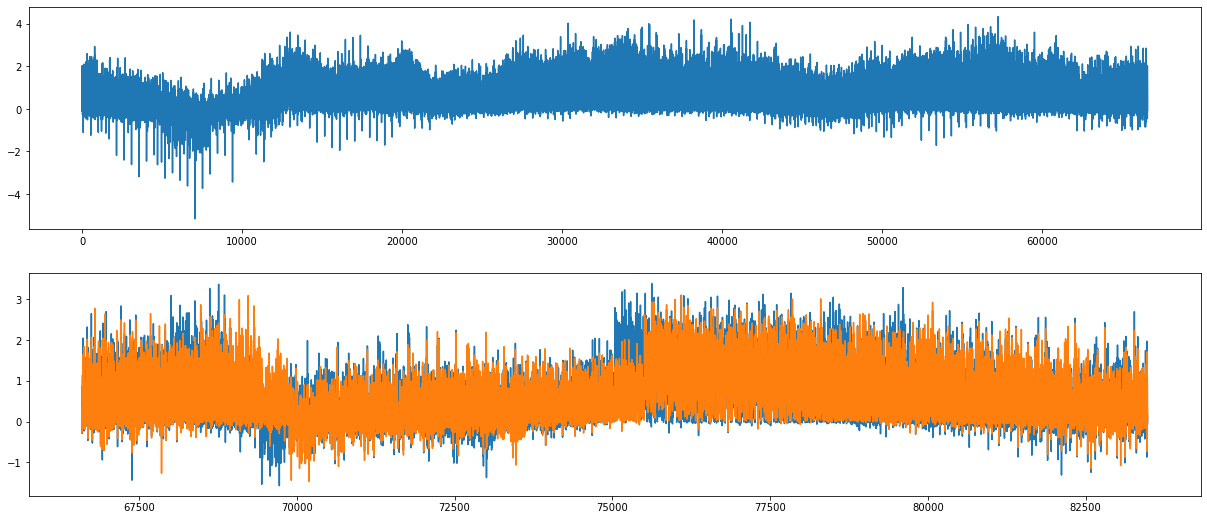

In [42]:
import matplotlib.pyplot as plt

fig, (ax1,ax2) = plt.subplots(2,1, figsize=(21,9))
ax1.plot(y_train)
ax2.plot(y_test)


**CONCLUSIONS (LR with Momentum Features)**

1. Plain-Vanilla Linear Models when considering the whole sample and with a 70%, 30% split, are working reasonably well if the 12M-window ISR observed one-period ahead is chosen as the target (respone).

2. Let us derive the OOS performances to get an insight if this finding is relevant or not in terms of forward cumulative returns

#### 5.2.2 Out-Of-Sample Performance 

In [44]:
predictions = test.loc[:,["Date","symbols"]]
predictions["ISR12M_predicted"] = y_pred
predictions

,Date,symbols,ISR12M_predicted
66598,2019-08-30,A,0.341718
66599,2019-08-30,AA,-0.266053
66600,2019-08-30,AAPL,0.175226
66601,2019-08-30,ABC,0.079762
66602,2019-08-30,ABT,1.140810
...,...,...,...
83477,2022-07-29,XRX,-0.031407
83478,2022-07-29,Y,1.130865
83479,2022-07-29,YUM,0.077743
83480,2022-07-29,ZBH,-0.012178


In [48]:
predictions_ts = pd.pivot(
    predictions,
    index=["Date"],
    columns="symbols",
    values="ISR12M_predicted"
)

In [49]:
from modules import performance_measures_helper as pms

predictions_rank = predictions_ts.rank(axis=1).apply(pms.scorer, axis=1)
predictions_rank

symbols,A,AA,AAPL,ABC,ABT,ACIW,ADBE,ADI,ADM,ADP,...,WWW,WY,XEL,XOM,XRAY,XRX,Y,YUM,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-30,12,0,11,9,17,12,13,14,5,16,...,2,9,19,7,17,13,16,19,15,4
2019-09-30,11,0,10,7,15,13,10,15,4,12,...,2,8,19,4,18,13,18,18,12,5
2019-10-31,12,0,15,6,15,13,11,14,4,14,...,2,12,19,3,18,13,17,15,15,7
2019-11-29,10,0,19,6,14,15,13,13,4,14,...,4,14,15,2,18,16,16,10,17,9
2019-12-31,12,0,19,6,14,14,16,14,8,15,...,4,15,18,3,14,18,15,7,17,10
2020-01-31,11,0,19,6,14,11,17,9,11,14,...,6,13,19,2,14,13,16,12,15,5
2020-02-28,11,0,19,14,10,5,19,12,9,12,...,6,15,17,2,11,14,13,5,15,7
2020-03-31,14,0,19,19,16,8,19,12,12,13,...,2,5,18,3,9,4,13,7,10,5
2020-04-30,13,0,19,17,18,8,18,14,11,12,...,2,12,17,4,8,2,8,10,13,4


In [59]:
import pickle

with open("data/config/20220831_returns_scores.pkl","rb") as file:
    return_data = pickle.load(file)

return_data.keys()

dict_keys(['raw_returns', 'sma_vols', 'ewma_vols', 'score'])

In [ ]:
monthly_rets = return_data["raw_returns"]["monthly"]

In [ ]:
monthly_rets = monthly_rets[predictions_rank.index[0]:predictions_rank.index[-1]]
monthly_rets

In [102]:
mask = predictions_rank.shift(1)==19
#mask.sum(axis=1)
mask

symbols,A,AA,AAPL,ABC,ABT,ACIW,ADBE,ADI,ADM,ADP,...,WWW,WY,XEL,XOM,XRAY,XRX,Y,YUM,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2019-08-30,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2019-09-30,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False
2019-10-31,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2019-11-29,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2019-12-31,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-01-31,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-02-28,False,False,True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2020-03-31,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2020-04-30,False,False,True,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [93]:
monthly_rets.index = monthly_rets.index.strftime("%Y-%m-%d")

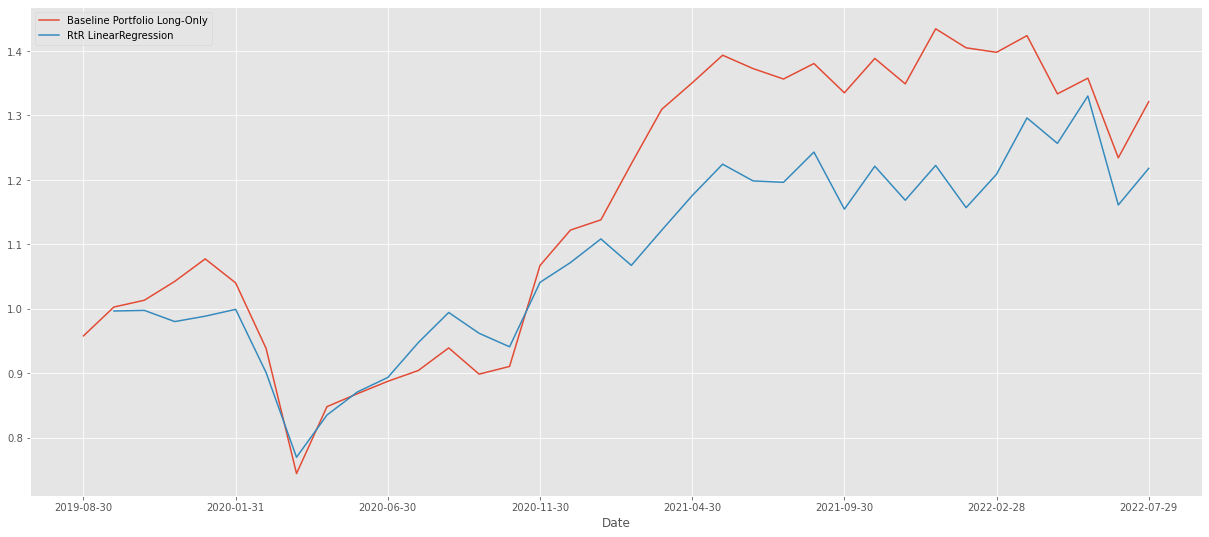

In [104]:
plt.style.use("ggplot")

(1+monthly_rets.mean(axis=1)).rename("Baseline Portfolio Long-Only").cumprod().plot(figsize=(21,9), legend=True)
(1+monthly_rets[mask][mask.index[0]:].mean(axis=1)).rename("RtR LinearRegression").cumprod().plot(legend=True);

#plt.semilogy();


In [109]:
# 77% on test is not enough to outperform baseline portfolio, but a good starting point.
# Don't forget we are working with a very simple plain-vanilla MultiVariate Reg. 
# Higher Scores could improve OOS performances.

# Test/Compare with perfect ranking
%whos DataFrame

Variable           Type         Data/Info
-----------------------------------------
X_test             DataFrame             RRET3M    RRET6M<...>n[16884 rows x 9 columns]
X_train            DataFrame             RRET3M    RRET6M<...>n[66598 rows x 9 columns]
corr               DataFrame                            R<...>658748         1.000000  
data               DataFrame                 Date symbols<...>[83482 rows x 22 columns]
mask               DataFrame    symbols         A     AA <...>\n[36 rows x 469 columns]
monthly_rets       DataFrame                       A     <...>\n[36 rows x 469 columns]
predictions        DataFrame                 Date symbols<...>n[16884 rows x 3 columns]
predictions_rank   DataFrame    symbols      A  AA  AAPL <...>\n[36 rows x 469 columns]
predictions_ts     DataFrame    symbols            A     <...>\n[36 rows x 469 columns]
test               DataFrame                 Date symbols<...>[16884 rows x 22 columns]
train              DataFrame        

In [110]:
data

,Date,symbols,RRET1M,RRET2M,RRET3M,RRET6M,RRET12M,SRET1M,SRET2M,SRET3M,...,ISR3M,ISR6M,ISR12M,raw_ret_nextmonth,scaled_ret_nextmonth,ISC3M,ISC6M,ISC12M,ISR6M_nexmonth,ISR12M_nexmonth
0,2007-10-31,A,-0.004054,0.012362,-0.045831,0.010974,0.120625,-0.043954,0.094777,-0.286889,...,-0.043293,0.218709,0.592724,0.026594,0.580568,6.0,9.0,14.0,0.036569,0.648748
1,2007-10-31,AA,0.023467,0.088467,0.049675,0.139174,0.442392,0.213632,0.569478,0.261090,...,0.694973,0.873066,1.274447,-0.081334,-1.135545,5.0,9.0,15.0,-0.056752,0.747572
2,2007-10-31,AAPL,0.198801,0.371679,0.391677,0.891933,1.361976,1.708604,2.258785,1.943524,...,3.461684,3.534918,2.782748,-0.040695,-0.407476,12.0,17.0,19.0,2.068422,2.032981
3,2007-10-31,ABC,0.037894,-0.015465,0.027289,-0.055854,0.041181,0.451016,-0.130154,0.187520,...,0.510378,-0.021059,0.413389,-0.035294,-0.683159,4.0,9.0,10.0,-0.038692,0.164794
4,2007-10-31,ABT,-0.009210,0.058548,0.073018,-0.036949,0.187770,-0.145429,0.653751,0.665704,...,1.383667,-0.011155,0.947518,0.052911,1.420552,11.0,11.0,17.0,0.542060,1.151533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83477,2022-07-29,XRX,0.136695,-0.060710,-0.007128,-0.137710,-0.257794,1.040358,-0.326718,-0.031321,...,0.162517,-0.085528,-0.090846,-0.029772,-0.237270,6.0,9.0,5.0,-0.078156,-0.069290
83478,2022-07-29,Y,0.005922,0.004173,-0.005002,0.303045,0.271664,0.704679,0.351116,-0.343658,...,-0.000619,1.505580,0.904912,0.004418,0.056570,12.0,15.0,18.0,1.362023,0.910676
83479,2022-07-29,YUM,0.076518,0.023128,0.030349,0.032540,-0.043256,1.061030,0.226769,0.242966,...,0.597081,0.375240,-0.009783,-0.087764,-1.205921,6.0,9.0,8.0,-0.033792,-0.027119
83480,2022-07-29,ZBH,0.036039,-0.076696,-0.112113,-0.058252,-0.295957,0.422669,-0.636032,-0.759136,...,-0.129716,-0.021664,-0.075548,-0.036869,-0.551685,6.0,9.0,4.0,-0.068347,-0.073511


In [111]:
observed_rank = data[["Date","symbols","ISC12M"]]
observed_rank

,Date,symbols,ISC12M
0,2007-10-31,A,14.0
1,2007-10-31,AA,15.0
2,2007-10-31,AAPL,19.0
3,2007-10-31,ABC,10.0
4,2007-10-31,ABT,17.0
...,...,...,...
83477,2022-07-29,XRX,5.0
83478,2022-07-29,Y,18.0
83479,2022-07-29,YUM,8.0
83480,2022-07-29,ZBH,4.0


In [112]:
observed_rank = pd.pivot(
    observed_rank,
    index="Date",
    columns="symbols",
    values="ISC12M"
)

observed_rank

symbols,A,AA,AAPL,ABC,ABT,ACIW,ADBE,ADI,ADM,ADP,...,WWW,WY,XEL,XOM,XRAY,XRX,Y,YUM,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2007-10-31,14.0,15.0,19.0,10.0,17.0,1.0,12.0,7.0,12.0,12.0,...,5.0,13.0,11.0,15.0,18.0,10.0,16.0,15.0,6.0,2.0
2007-11-30,12.0,15.0,19.0,10.0,15.0,0.0,12.0,9.0,18.0,11.0,...,7.0,12.0,11.0,17.0,19.0,9.0,14.0,17.0,5.0,1.0
2007-12-31,14.0,14.0,19.0,9.0,16.0,0.0,8.0,7.0,18.0,9.0,...,8.0,8.0,9.0,17.0,19.0,8.0,14.0,17.0,10.0,2.0
2008-01-31,12.0,16.0,18.0,7.0,14.0,1.0,8.0,5.0,19.0,10.0,...,12.0,4.0,9.0,18.0,18.0,8.0,11.0,17.0,9.0,1.0
2008-02-29,8.0,15.0,19.0,5.0,12.0,1.0,7.0,7.0,17.0,11.0,...,14.0,9.0,7.0,17.0,18.0,8.0,10.0,18.0,9.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-31,8.0,18.0,17.0,17.0,10.0,2.0,3.0,13.0,19.0,16.0,...,0.0,15.0,13.0,19.0,1.0,2.0,16.0,11.0,2.0,12.0
2022-04-29,9.0,18.0,16.0,19.0,14.0,1.0,4.0,13.0,18.0,16.0,...,1.0,16.0,15.0,19.0,1.0,4.0,15.0,13.0,3.0,12.0
2022-05-31,6.0,17.0,13.0,18.0,11.0,3.0,2.0,9.0,18.0,15.0,...,1.0,14.0,16.0,19.0,1.0,2.0,17.0,12.0,3.0,13.0


In [113]:
perfect_mask = observed_rank.shift(1)==19

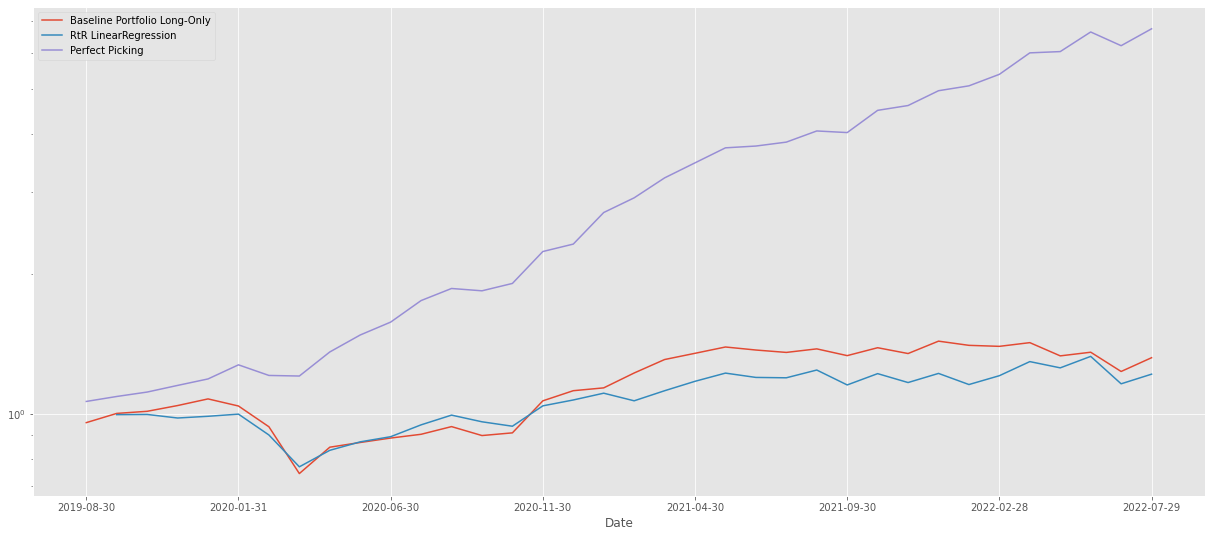

In [116]:
plt.style.use("ggplot")

(1+monthly_rets.mean(axis=1)).rename("Baseline Portfolio Long-Only").cumprod().plot(figsize=(21,9), legend=True)
(1+monthly_rets[mask][mask.index[0]:].mean(axis=1)).rename("RtR LinearRegression").cumprod().plot(legend=True)
(1+monthly_rets[perfect_mask][mask.index[0]:].mean(axis=1)).rename("Perfect Picking").cumprod().plot(legend=True);

plt.semilogy();

In [131]:
trained_stock_picking_first_period = set(predictions_rank.columns[predictions_rank.iloc[-1]==19])

In [132]:
ideal_stock_picking_first_period = set(observed_rank.columns[observed_rank[predictions_rank.index[0]:].iloc[-1]==19])

In [133]:
len(trained_stock_picking_first_period.intersection(ideal_stock_picking_first_period)) / len(ideal_stock_picking_first_period)

0.8333333333333334

#### 5.2.3 Rolling Re-Training
1. (`200710`, `201010`) training. (`201011`,`201111`) for testing (show scores)
2. (`200810`, `201110`) training. (`201111`,`201211`) for testing (show scores)
3. An so on

In [112]:
months_chunksize = 48
chunksize = months_chunksize*instances_by_date #chunk row size

offset = 36
offset *= instances_by_date

In [126]:
data.shape[0]

83482

In [129]:
list(
    range(0, data.shape[0], chunksize)
)

[0, 22512, 45024, 67536]

In [131]:
list(range(0,data.shape[0],chunksize))

frontiers = [(i, i+chunksize) for i in range(0, data.shape[0], 12*instances_by_date) if (i+chunksize<data.shape[0])]
frontiers

[(0, 22512),
 (5628, 28140),
 (11256, 33768),
 (16884, 39396),
 (22512, 45024),
 (28140, 50652),
 (33768, 56280),
 (39396, 61908),
 (45024, 67536),
 (50652, 73164),
 (56280, 78792)]

In [135]:
dates = [
    (
        data["Date"].iloc[frontiers[i][0]], data["Date"].iloc[frontiers[i][1]]
    )
    for i, _ in enumerate(frontiers)        
]

In [136]:
# Sliding Sets (3yr Train, 1yr Test for LR)
dates

[('2007-10-31', '2011-10-31'),
 ('2008-10-31', '2012-10-31'),
 ('2009-10-30', '2013-10-31'),
 ('2010-10-29', '2014-10-31'),
 ('2011-10-31', '2015-10-30'),
 ('2012-10-31', '2016-10-31'),
 ('2013-10-31', '2017-10-31'),
 ('2014-10-31', '2018-10-31'),
 ('2015-10-30', '2019-10-31'),
 ('2016-10-31', '2020-10-30'),
 ('2017-10-31', '2021-10-29')]

In [139]:
list_data = list()
list_data = [data[i:i+chunksize] for i in range(0, data.shape[0], 12*instances_by_date) if (i+chunksize<data.shape[0])]
list_data.append(data[data.shape[0]-chunksize:])

In [150]:

dates = [
    (
        list_data[i]["Date"].iloc[0], list_data[i]["Date"].iloc[-1]
    )
    for i, _ in enumerate(list_data)
]

In [151]:
dates

[('2007-10-31', '2011-09-30'),
 ('2008-10-31', '2012-09-28'),
 ('2009-10-30', '2013-09-30'),
 ('2010-10-29', '2014-09-30'),
 ('2011-10-31', '2015-09-30'),
 ('2012-10-31', '2016-09-30'),
 ('2013-10-31', '2017-09-29'),
 ('2014-10-31', '2018-09-28'),
 ('2015-10-30', '2019-09-30'),
 ('2016-10-31', '2020-09-30'),
 ('2017-10-31', '2021-09-30'),
 ('2018-08-31', '2022-07-29')]

In [153]:
# LR fitting for all Sequential Train, Test
list_data[-2].shape[0]

22512

In [165]:
split = instances_by_date*36

In [192]:
# No validation set here (for parameter tuning). OLS is not tunable. Study for LASSO, Ridge and so on
# For logging
history_ = dict()
dates_train = list()
dates_test = list()

# Metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import RobustScaler, MinMaxScaler
import numpy as np

train_R2 = list()
R2 = list()
MSE = list()
MAE = list()

# scaled returns as the label
for chunk in list_data:
    train = chunk[:split]
    test = chunk[split:]

    dates_train.append((train["Date"].iloc[0],train["Date"].iloc[-1]))
    dates_test.append((test["Date"].iloc[0],test["Date"].iloc[-1]))
    
    X_train, y_train, X_test, y_test = \
        train.iloc[:,2:-2], train.loc[:,["scaled_next_month"]], test.iloc[:,2:-2], test.loc[:,["scaled_next_month"]]

    lr = LinearRegression() 
    scaler = RobustScaler()

    #X_train_scaled = scaler.fit_transform(X_train)
    #X_test_scaled = scaler.transform(X_test)

    lr.fit(X_train, y_train)

    y_pred = lr.predict(X_test)

    R2.append(np.abs(100)*lr.score(X_test, y_test))
    train_R2.append(np.abs(100)*lr.score(X_train, y_train))
    MSE.append(mean_squared_error(y_test, y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))

history_["train_R2_prcnt"] = train_R2
history_["R2_prcnt"] = R2
history_["MSE"] = MSE
history_["MAE"] = MAE
history_["train_set"] = dates_train
history_["test_set"] = dates_test

In [187]:
history_metrics_lr = pd.DataFrame(history_)
history_metrics_lr.describe()

,train_R2_prcnt,R2_prcnt,MSE,MAE
count,12.000000,12.000000,12.000000,12.000000
mean,1.255855,-6.059992,0.913909,0.779201
std,0.497693,6.309937,0.126241,0.056220
min,0.497136,-23.509882,0.630190,0.643722
25%,0.824317,-7.149160,0.857769,0.756320
50%,1.265568,-4.326021,0.908439,0.778154
75%,1.534232,-3.032421,0.996775,0.819201
max,2.047248,1.183196,1.137106,0.843871


In [193]:
history_metrics_lr

,train_R2_prcnt,R2_prcnt,MSE,MAE,train_set,test_set
0,0.767750,-4.393585,0.914956,0.780260,"(2007-10-31, 2010-09-30)","(2010-10-29, 2011-09-30)"
1,0.497136,-0.992368,0.630190,0.643722,"(2008-10-31, 2011-09-30)","(2011-10-31, 2012-09-28)"
2,1.311678,-9.082336,0.885813,0.776047,"(2009-10-30, 2012-09-28)","(2012-10-31, 2013-09-30)"
3,1.143407,1.183196,0.849286,0.758896,"(2010-10-29, 2013-09-30)","(2013-10-31, 2014-09-30)"
4,2.047248,-4.258456,1.027520,0.838945,"(2011-10-31, 2014-09-30)","(2014-10-31, 2015-09-30)"
5,2.047047,-5.536388,0.901923,0.774093,"(2012-10-31, 2015-09-30)","(2015-10-30, 2016-09-30)"
6,1.387147,-4.098884,0.860597,0.748592,"(2013-10-31, 2016-09-30)","(2016-10-31, 2017-09-29)"
7,0.843173,-2.409173,0.997098,0.817172,"(2014-10-31, 2017-09-29)","(2017-10-31, 2018-09-28)"
8,0.719382,-3.240170,0.996667,0.825287,"(2015-10-30, 2018-09-28)","(2018-10-31, 2019-09-30)"
9,1.561792,-9.877089,1.137106,0.843871,"(2016-10-31, 2019-09-30)","(2019-10-31, 2020-09-30)"


In [191]:
# Pensar en un Pipeline() para:
# 1. Distintos ML Simple Models.
# 2. Distintos Scalers.
# ==============================
Xscaled_history_metrics_lr = history_metrics_lr.copy()


In [194]:
Xscaled_history_metrics_lr

,train_R2_prcnt,R2_prcnt,MSE,MAE,train_set,test_set
0,0.767750,-4.393585,0.914956,0.780260,"(2007-10-31, 2010-09-30)","(2010-10-29, 2011-09-30)"
1,0.497136,-0.992368,0.630190,0.643722,"(2008-10-31, 2011-09-30)","(2011-10-31, 2012-09-28)"
2,1.311678,-9.082336,0.885813,0.776047,"(2009-10-30, 2012-09-28)","(2012-10-31, 2013-09-30)"
3,1.143407,1.183196,0.849286,0.758896,"(2010-10-29, 2013-09-30)","(2013-10-31, 2014-09-30)"
4,2.047248,-4.258456,1.027520,0.838945,"(2011-10-31, 2014-09-30)","(2014-10-31, 2015-09-30)"
5,2.047047,-5.536388,0.901923,0.774093,"(2012-10-31, 2015-09-30)","(2015-10-30, 2016-09-30)"
6,1.387147,-4.098884,0.860597,0.748592,"(2013-10-31, 2016-09-30)","(2016-10-31, 2017-09-29)"
7,0.843173,-2.409173,0.997098,0.817172,"(2014-10-31, 2017-09-29)","(2017-10-31, 2018-09-28)"
8,0.719382,-3.240170,0.996667,0.825287,"(2015-10-30, 2018-09-28)","(2018-10-31, 2019-09-30)"
9,1.561792,-9.877089,1.137106,0.843871,"(2016-10-31, 2019-09-30)","(2019-10-31, 2020-09-30)"


In [ ]:
X